# Самая простая нейросеть

Самой простой из возможных конфигураций нейросетей является один нейрон с одним входом и одним выходом без активации (или можно сказать с линейной активацией f(x) = x)

32/32 [==============================] - 0s 763us/step


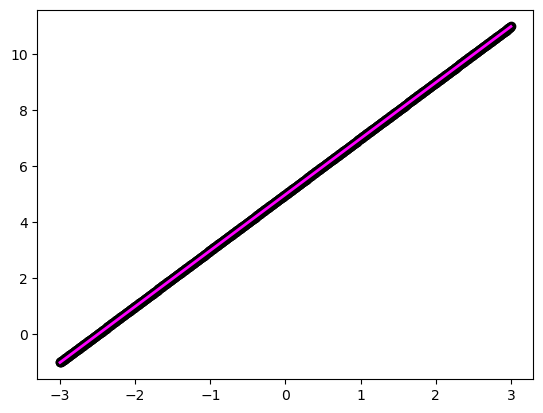

[array([[1.9999999]], dtype=float32), array([4.999989], dtype=float32)]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return 2 * x + 5

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=10, verbose = 0)
model.fit(x, y, epochs=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Решаем более полную задачу
Попробуем теперь усложнить задачу, взяв более сложную функцию:

2 * np.sin(x) + 5

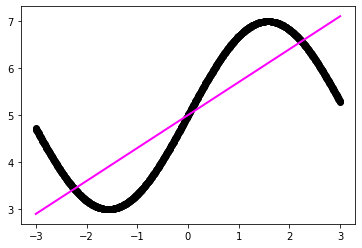

[array([[0.7013333]], dtype=float32), array([5.0026746], dtype=float32)]


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return 2 * np.sin(x) + 5

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

В выводе параметров сети первое число — это вес w, второе — смещение b. 
Чтобы убедиться в этом, давайте нарисуем прямую 

f(x) = w * x + b:


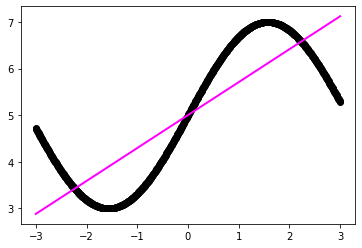

[array([[0.70657367]], dtype=float32), array([5.0019097], dtype=float32)]


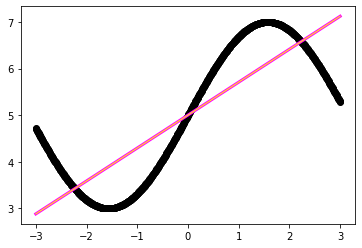

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return 2 * np.sin(x) + 5

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    model = Sequential()
    model.add(Dense(1, input_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=100, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)
    
def line(x):
    w = model.layers[0].get_weights()[0][0][0]
    b = model.layers[0].get_weights()[1][0]
    
    return w * x + b

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=3, antialiased=True)
plt.plot(x, line(x), color='yellow', linewidth=1, antialiased=True)
plt.show()

# Работа с функцией активации 
Чтобы сделать прогноз более точным, используем в нейронах внутреннего слоя функцию активации ReLU 
Данное решение позволяет сети "сломать" прямую на сегменты.
Поэкспериментируем с числом нейронов скрытого слоя

32/32 [==============================] - 0s 849us/step


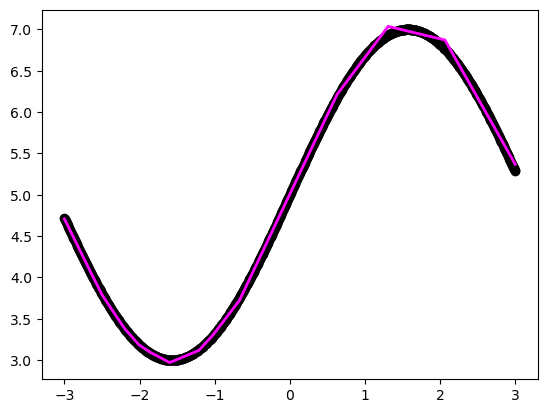

[array([[-0.59778154,  0.02952053,  0.12056937,  0.493053  ,  0.07538316,
         0.13527237,  0.10359164, -1.0268606 ,  0.27379724, -0.22028804,
         0.84011   ,  1.0027239 , -0.22913279, -0.25261718, -0.8617831 ,
         0.46775615,  0.4671137 , -0.06736667, -0.7486924 , -0.01367178]],
      dtype=float32), array([-0.7240939 , -0.10203397, -0.423819  ,  0.99137926,  0.5702923 ,
        0.37087682,  0.6912401 , -0.68845636,  0.61665815, -0.22767282,
       -1.7333759 , -1.3109919 , -0.42776534, -0.26057515,  0.5392329 ,
        1.1692268 ,  1.0233629 ,  0.2020491 , -1.1965253 ,  0.26104695],
      dtype=float32)]
[array([[ 1.007009  ],
       [ 0.1006507 ],
       [ 0.40149978],
       [ 0.8695087 ],
       [-0.11772373],
       [ 0.2846627 ],
       [-0.15921883],
       [ 0.71162635],
       [ 0.33464125],
       [ 0.33458397],
       [-1.6527048 ],
       [-1.4264991 ],
       [ 0.5465865 ],
       [ 0.5259592 ],
       [-0.8186622 ],
       [ 0.950416  ],
       [ 0.5214179 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return 2 * np.sin(x) + 5

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Усложняем функцию
Синус — довольно удачная функция для оптимизации. Главным образом потому, что у него нет широких плато — т.е. областей, где функция изменяется очень медленно. К тому же сама функция изменяется довольно равномерно. 
Чтобы проверить нашу конфигурацию нейросети на работоспособность, возьмём более сложную функцию:

x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

Здесь также поработаем с размером скрытого слоя

32/32 [==============================] - 0s 1ms/step


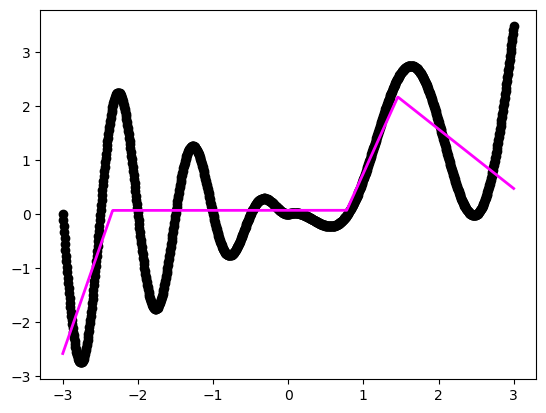

[array([[ 0.6799984 , -0.1338313 , -0.40338525, -0.210936  ,  0.57140094,
        -0.00937792,  1.4437225 ,  2.2397382 ,  0.78762734,  2.0725765 ,
         0.90241873, -0.896538  ,  0.00848163, -0.09584109,  0.44430837,
         0.3374616 , -2.521013  ,  0.02113944,  0.8560774 , -0.00703623]],
      dtype=float32), array([-0.5283975 , -1.3262703 , -1.3295292 , -3.5895398 , -0.44401953,
       -0.09324279, -1.1222006 , -3.2648022 , -0.61203694, -3.0224648 ,
       -0.7012897 , -2.840585  , -0.3245997 , -0.9066055 , -0.64792085,
       -0.26224434, -5.890525  , -0.09931164, -0.6653948 , -0.4013674 ],
      dtype=float32)]
[array([[ 0.40805715],
       [-0.8348745 ],
       [-0.77103126],
       [-2.4665337 ],
       [ 0.34288636],
       [ 0.02189809],
       [ 0.8665085 ],
       [-0.98797995],
       [ 0.47264075],
       [-0.9146366 ],
       [ 0.5416726 ],
       [-1.8183848 ],
       [ 0.11184818],
       [-0.56789273],
       [-0.19608314],
       [ 0.20256186],
       [-1.5882801 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='relu'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Увеличиваем нелинейность
Применяем более сложную функцию активации – гиперболический тангенс

32/32 [==============================] - 0s 966us/step


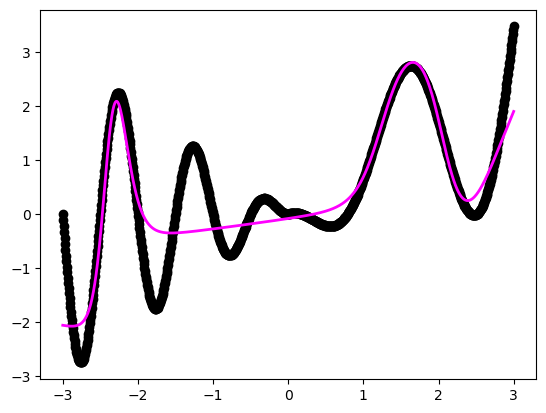

[array([[-0.09888351, -3.2060254 , -2.981015  , -0.09944774, -1.1899375 ,
         0.09954419,  0.10063517, -0.10156882, -0.10070266, -0.09512135,
         0.10112164, -0.10077314,  5.674166  ,  1.3294882 ,  0.10034128,
        -0.09983077,  4.347009  , -0.10015486, -0.10164934, -0.10903288]],
      dtype=float32), array([-0.03576694,  6.5990286 ,  3.714458  , -0.06719869, -3.6570897 ,
       -0.03761235,  0.10097879, -0.12004825, -0.10276243, -0.09008506,
        0.11503409, -0.10401274, 13.704105  , -3.631343  ,  0.0943031 ,
       -0.08019778,  9.777443  , -0.08917015, -0.12139593,  0.18434632],
      dtype=float32)]
[array([[-0.12821928],
       [ 2.5426    ],
       [-1.4437249 ],
       [-0.1374953 ],
       [ 0.38993615],
       [ 0.10978022],
       [ 0.1484599 ],
       [-0.15510644],
       [-0.14903094],
       [-0.1313217 ],
       [ 0.15276866],
       [-0.14950131],
       [ 4.5144653 ],
       [ 2.703718  ],
       [ 0.14617449],
       [-0.14158319],
       [-3.6348128 

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Совершенствуем стартовую разметку
Используем стартовую инициализацию весов glorot_normal, моделирующую усеченное равномерное распределение с центром в 0

32/32 [==============================] - 0s 961us/step


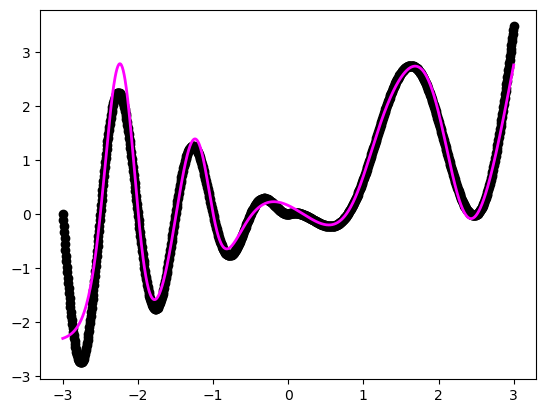

[array([[-2.6121318 ,  1.1271313 , -4.4184966 ,  4.4747853 ,  0.52998984,
        -0.501044  , -2.6943839 ,  0.5679795 ,  0.52059287, -0.6728977 ,
         2.7503536 , -0.8323945 , -4.1640882 , -0.07441291,  0.8810962 ,
         2.1663392 , -1.1185185 , -0.9930917 ,  0.5986114 ,  0.08181245]],
      dtype=float32), array([ 5.5845675 , -3.2934816 , -4.7118893 ,  9.274389  , -1.2840909 ,
        1.1185488 ,  2.8396015 , -0.24588983, -0.5573738 ,  0.2051461 ,
        4.039078  ,  2.3888533 , -9.96659   ,  1.5595592 , -2.541932  ,
        1.9351132 ,  0.1108759 ,  0.4702594 , -1.5856727 , -1.2270722 ],
      dtype=float32)]
[array([[ 4.580822  ],
       [ 2.4921196 ],
       [ 3.5420496 ],
       [-4.815936  ],
       [ 1.1705264 ],
       [-1.0587217 ],
       [-1.4246405 ],
       [ 0.33575892],
       [ 0.6812586 ],
       [-0.46555272],
       [ 3.222577  ],
       [-1.8425975 ],
       [-4.328263  ],
       [ 1.8673829 ],
       [ 1.9426119 ],
       [ 2.3185904 ],
       [ 0.5157805 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh', bias_initializer='glorot_normal', kernel_initializer='glorot_normal'))
    model.add(Dense(1, input_dim=20, activation='linear', bias_initializer='glorot_normal', kernel_initializer='glorot_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

Используем стартовую инициализацию весов he_normal, моделирующую усеченное гауссовское распределение с центром в 0

32/32 [==============================] - 0s 1ms/step


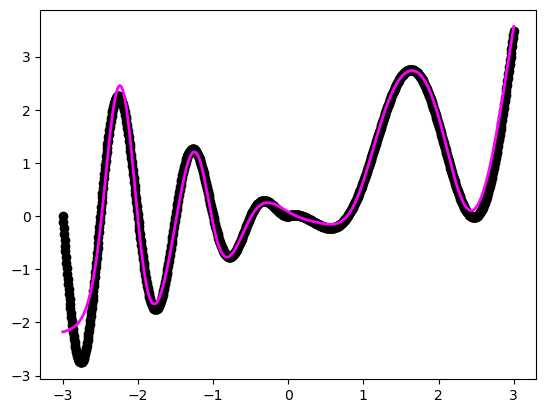

[array([[-1.6186378 ,  1.618618  , -1.8574575 , -0.01503401, -0.9328918 ,
         4.6524186 , -2.4285152 , -1.2580847 , -2.2625964 ,  0.7657208 ,
        -2.5583704 , -1.5091008 ,  2.1652043 ,  2.467691  ,  3.4791074 ,
        -1.1569563 ,  4.3213954 , -4.0335298 , -0.69636554, -1.8160614 ]],
      dtype=float32), array([-1.7879747 ,  0.5336575 , -2.4243872 , -3.2960777 , -0.14861897,
       11.175841  ,  1.6280509 , -0.65818495, -3.2603674 ,  0.07449162,
        2.8018723 ,  0.96482086,  0.5247116 , -5.3545556 ,  1.9825841 ,
        3.3202543 ,  8.883921  , -4.377707  ,  0.7116025 ,  5.2862935 ],
      dtype=float32)]
[array([[-1.5026631 ],
       [-1.156258  ],
       [-1.8992203 ],
       [-2.8143616 ],
       [-0.37475032],
       [ 3.5858788 ],
       [ 0.91570616],
       [-0.98621756],
       [-2.6205935 ],
       [-0.05538604],
       [-1.8520762 ],
       [-0.32826948],
       [-0.8442372 ],
       [-3.6239579 ],
       [ 0.7439755 ],
       [-2.2252061 ],
       [-4.6119313 

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(1, input_dim=20, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Рассмотрим поведение отдельных нейронов
Видим, что каждый из нейронов (синие линии) настроен на моделирование нелинейности на определенном участке области определения функции

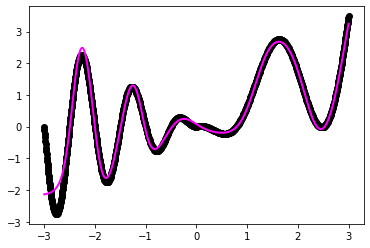

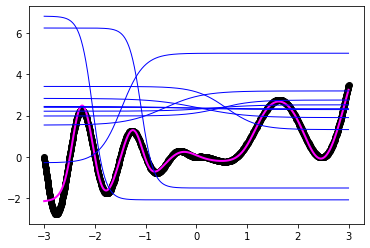

[array([[-1.3094747 , -0.9124592 , -4.208561  ,  1.1568167 ,  1.0587648 ,
        -1.5063466 , -1.6181937 , -4.1626043 , -1.1202744 ,  2.2666578 ,
         0.86472434, -5.1106095 ,  2.8354783 ,  0.79619837, -1.577904  ,
        -2.0786746 , -1.1339029 ,  2.5306196 , -2.5813417 ,  1.9815731 ]],
      dtype=float32), array([ -0.8273919 ,  -0.12039485,  -4.576542  ,  -0.36900425,
        -0.06554929,   0.7082764 ,   0.9601769 ,  -8.5058565 ,
        -0.12523833,   3.3432376 ,  -0.01697596, -12.408441  ,
        -3.2927387 ,  -0.15871832,  -1.2638311 ,   6.0344205 ,
         0.35650817,  -5.5039463 ,  -0.2805469 ,   2.7295582 ],
      dtype=float32)]
[array([[-0.8251634 ],
       [ 0.07605712],
       [ 3.8666666 ],
       [ 0.15430139],
       [-0.4651107 ],
       [-0.3854221 ],
       [ 1.043187  ],
       [ 4.439306  ],
       [ 0.03441396],
       [ 2.6485107 ],
       [ 0.55238444],
       [-3.2848887 ],
       [ 1.8595845 ],
       [ 0.5256309 ],
       [-1.288486  ],
       [-4.660

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(1, input_dim=20, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# с помощью матрицы весов моделируем выход каждого отдельного нейрона перед суммацией
def tanh(x, i):
    w0 = model.layers[0].get_weights()
    w1 = model.layers[1].get_weights()
    
    return w1[0][i][0] * np.tanh(w0[0][0][i] * x + w0[1][i]) + w1[1][0]

# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x, tanh(x, i), color='blue',
         linewidth=1)

plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Интерполяция, но не экстраполяция
Можно видеть, что функция воспроизводится адекватно только в "изученной" сетью области.
За ее пределами результат как отдельных нейронов, так и сети в целом стремится к константе.

32/32 [==============================] - 0s 1ms/step


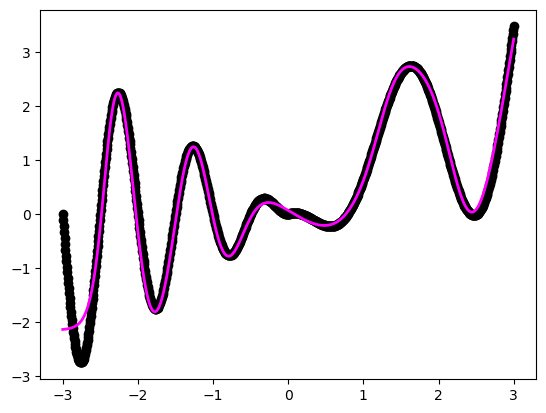

32/32 [==============================] - 0s 967us/step


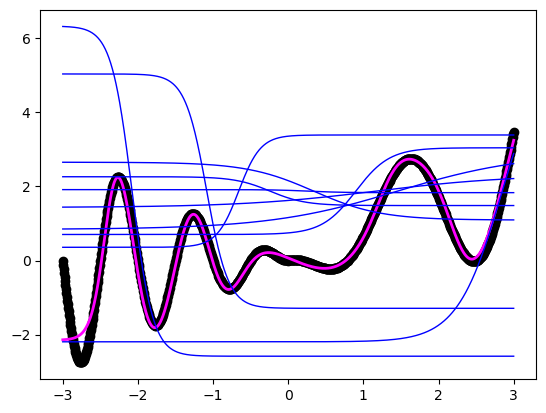

[array([[ 3.4377236 , -0.5569074 , -0.5851133 , -1.1222878 , -2.1216354 ,
        -2.2240586 , -1.6765378 , -2.1617436 , -3.6322272 , -3.4835908 ,
         1.2132299 , -5.2482777 ,  3.088203  , -1.7701387 , -2.735934  ,
        -0.6159137 ,  0.78210586,  3.165029  , -0.09556509, -1.5170065 ]],
      dtype=float32), array([  2.2659883 ,   0.64953196,   0.84951115,   0.38042384,
        -0.5133802 ,   1.9988825 ,   4.7743254 ,   0.5795375 ,
        -7.547626  ,  -3.7753825 ,   0.0771622 , -12.738289  ,
        -3.845036  ,   2.6638045 ,   6.051789  ,   1.237455  ,
        -1.9458185 ,   4.721742  ,   1.2519008 ,   1.4339646 ],
      dtype=float32)]
[array([[ 1.5171615 ],
       [-0.44067404],
       [-1.0336984 ],
       [ 0.78129214],
       [ 0.38909188],
       [-1.1709522 ],
       [-4.070709  ],
       [ 0.04091682],
       [ 4.459477  ],
       [ 3.1655967 ],
       [-0.09572511],
       [-3.6368573 ],
       [ 1.914093  ],
       [ 1.768815  ],
       [ 3.584621  ],
       [-1.377

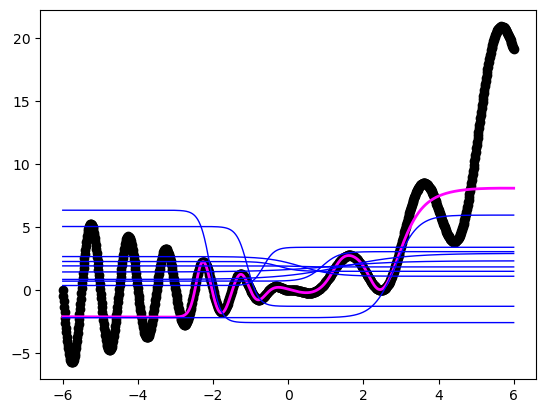

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(1, input_dim=20, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)
plt.show()

# с помощью матрицы весом моделируем выход каждого отдельного нейрона перед суммацией
def tanh(x, i):
    w0 = model.layers[0].get_weights()
    w1 = model.layers[1].get_weights()
    
    return w1[0][i][0] * np.tanh(w0[0][0][i] * x + w0[1][i]) + w1[1][0]

# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x, tanh(x, i), color='blue',
         linewidth=1)

plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)
        
# накидываем тысячу точек от -6 до 6
x1 = np.linspace(-6, 6, 1000).reshape(-1, 1)

# вычисляем вектор значений функции
y1 = f(x1)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x1, y1, color='black', antialiased=True)
plt.plot(x1, model.predict(x1), color='magenta', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x1, tanh(x1, i), color='blue',
         linewidth=1)

plt.show()

# Усложним структуру сети
Наращиваем число слоев, варьируем число нейронов в слое. Улучшение результата аппроксимации видно на глаз. Экстраполяция не улучшилась

32/32 [==============================] - 0s 989us/step


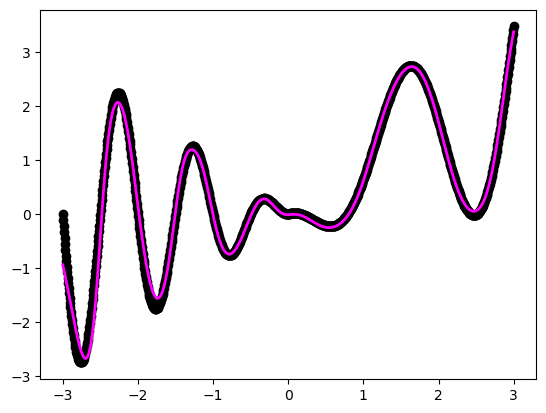

[array([[ 1.6321931 ,  2.3531678 ,  1.8469071 ,  0.75394565, -0.8931953 ,
         0.90629846,  3.0428784 , -2.2497797 , -1.0403125 ,  2.0158248 ,
         0.7531182 , -1.6110175 ]], dtype=float32), array([-1.2114567 ,  1.4699249 ,  0.49608877,  0.13237205,  2.7178254 ,
       -2.649938  ,  3.9348009 , -0.04249264,  1.2935253 ,  5.0500803 ,
       -1.6950105 , -0.13934842], dtype=float32)]
[array([[ 0.07733992,  0.40302438, -0.06813256, -0.03627468, -0.40418455,
        -1.0789871 ,  1.2721459 ,  0.17625189,  0.02268178,  0.23730566,
        -0.7896166 , -0.15194382],
       [ 0.29986152, -0.14608718, -0.16575938, -0.514106  ,  0.03539029,
        -0.43253177, -0.37116542, -0.3694622 , -0.19476679,  1.7230177 ,
        -0.738741  ,  0.8062806 ],
       [-0.55672187, -0.6909673 ,  0.3477988 , -0.22848648,  0.15897836,
        -0.29019773, -0.24869475,  0.3674749 , -0.78669083,  0.4845813 ,
        -0.69688296,  0.61772865],
       [ 0.3733579 ,  0.1800856 ,  0.6416952 , -0.28291434,  0.

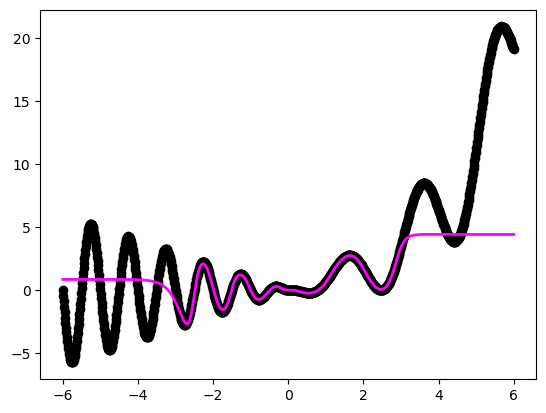

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim=1, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(12, input_dim=12, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))    
    model.add(Dense(1, input_dim=12, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 0)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)

plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)
        
# накидываем тысячу точек от -6 до 6
x1 = np.linspace(-6, 6, 1000).reshape(-1, 1)

# вычисляем вектор значений функции
y1 = f(x1)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x1, y1, color='black', antialiased=True)
plt.plot(x1, model.predict(x1), color='magenta', linewidth=2, antialiased=True)

plt.show()

# Анализируем точность в зависимости от длительности обучения и сложности сети
Попробуем различное количество эпох обучения, начав с 10 и увеличивая их на 10 за попытку
И затем - различное количество нейронов в скрытых слоях от 1 и будем наращивать до 50

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 12)                24        
                                                                 
 dense_30 (Dense)            (None, 12)                156       
                                                                 
 dense_31 (Dense)            (None, 1)                 13        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
32/32 - 0s - loss: 1.7090 - 267ms/epoch - 8ms/step
Epoch 2/400
32/32 - 0s - loss: 1.1429 - 36ms/epoch - 1ms/step
Epoch 3/400
32/32 - 0s - loss: 1.1115 - 40ms/epoch - 1ms/step
Epoch 4/400
32/32 - 0s - loss: 1.0891 - 41ms/epoch - 1ms/step
Epoch 5/400
32/32 - 0s - loss: 1.0914 - 38ms/epoch - 1ms/step
Epoch 6/

Epoch 118/400
32/32 - 0s - loss: 0.2371 - 26ms/epoch - 814us/step
Epoch 119/400
32/32 - 0s - loss: 0.2291 - 36ms/epoch - 1ms/step
Epoch 120/400
32/32 - 0s - loss: 0.2311 - 35ms/epoch - 1ms/step
Epoch 121/400
32/32 - 0s - loss: 0.2393 - 34ms/epoch - 1ms/step
Epoch 122/400
32/32 - 0s - loss: 0.2139 - 34ms/epoch - 1ms/step
Epoch 123/400
32/32 - 0s - loss: 0.2308 - 33ms/epoch - 1ms/step
Epoch 124/400
32/32 - 0s - loss: 0.2174 - 35ms/epoch - 1ms/step
Epoch 125/400
32/32 - 0s - loss: 0.2168 - 31ms/epoch - 983us/step
Epoch 126/400
32/32 - 0s - loss: 0.2188 - 33ms/epoch - 1ms/step
Epoch 127/400
32/32 - 0s - loss: 0.2124 - 31ms/epoch - 965us/step
Epoch 128/400
32/32 - 0s - loss: 0.2122 - 32ms/epoch - 1ms/step
Epoch 129/400
32/32 - 0s - loss: 0.2069 - 30ms/epoch - 935us/step
Epoch 130/400
32/32 - 0s - loss: 0.2117 - 33ms/epoch - 1ms/step
Epoch 131/400
32/32 - 0s - loss: 0.2049 - 30ms/epoch - 940us/step
Epoch 132/400
32/32 - 0s - loss: 0.2085 - 31ms/epoch - 966us/step
Epoch 133/400
32/32 - 0s - l

Epoch 245/400
32/32 - 0s - loss: 0.0410 - 34ms/epoch - 1ms/step
Epoch 246/400
32/32 - 0s - loss: 0.0433 - 28ms/epoch - 888us/step
Epoch 247/400
32/32 - 0s - loss: 0.0493 - 31ms/epoch - 962us/step
Epoch 248/400
32/32 - 0s - loss: 0.0427 - 30ms/epoch - 947us/step
Epoch 249/400
32/32 - 0s - loss: 0.0380 - 33ms/epoch - 1ms/step
Epoch 250/400
32/32 - 0s - loss: 0.0486 - 31ms/epoch - 965us/step
Epoch 251/400
32/32 - 0s - loss: 0.0465 - 32ms/epoch - 997us/step
Epoch 252/400
32/32 - 0s - loss: 0.0404 - 28ms/epoch - 861us/step
Epoch 253/400
32/32 - 0s - loss: 0.0621 - 32ms/epoch - 985us/step
Epoch 254/400
32/32 - 0s - loss: 0.0399 - 28ms/epoch - 878us/step
Epoch 255/400
32/32 - 0s - loss: 0.0400 - 29ms/epoch - 898us/step
Epoch 256/400
32/32 - 0s - loss: 0.0405 - 28ms/epoch - 886us/step
Epoch 257/400
32/32 - 0s - loss: 0.0526 - 27ms/epoch - 838us/step
Epoch 258/400
32/32 - 0s - loss: 0.0417 - 32ms/epoch - 998us/step
Epoch 259/400
32/32 - 0s - loss: 0.0837 - 35ms/epoch - 1ms/step
Epoch 260/400
32

32/32 - 0s - loss: 0.0268 - 31ms/epoch - 984us/step
Epoch 373/400
32/32 - 0s - loss: 0.0191 - 34ms/epoch - 1ms/step
Epoch 374/400
32/32 - 0s - loss: 0.0530 - 31ms/epoch - 974us/step
Epoch 375/400
32/32 - 0s - loss: 0.0255 - 35ms/epoch - 1ms/step
Epoch 376/400
32/32 - 0s - loss: 0.0173 - 36ms/epoch - 1ms/step
Epoch 377/400
32/32 - 0s - loss: 0.0154 - 37ms/epoch - 1ms/step
Epoch 378/400
32/32 - 0s - loss: 0.0216 - 31ms/epoch - 968us/step
Epoch 379/400
32/32 - 0s - loss: 0.0158 - 30ms/epoch - 937us/step
Epoch 380/400
32/32 - 0s - loss: 0.0204 - 41ms/epoch - 1ms/step
Epoch 381/400
32/32 - 0s - loss: 0.0166 - 32ms/epoch - 996us/step
Epoch 382/400
32/32 - 0s - loss: 0.0175 - 32ms/epoch - 1ms/step
Epoch 383/400
32/32 - 0s - loss: 0.0153 - 32ms/epoch - 1ms/step
Epoch 384/400
32/32 - 0s - loss: 0.0238 - 34ms/epoch - 1ms/step
Epoch 385/400
32/32 - 0s - loss: 0.0173 - 33ms/epoch - 1ms/step
Epoch 386/400
32/32 - 0s - loss: 0.0174 - 34ms/epoch - 1ms/step
Epoch 387/400
32/32 - 0s - loss: 0.0210 - 35

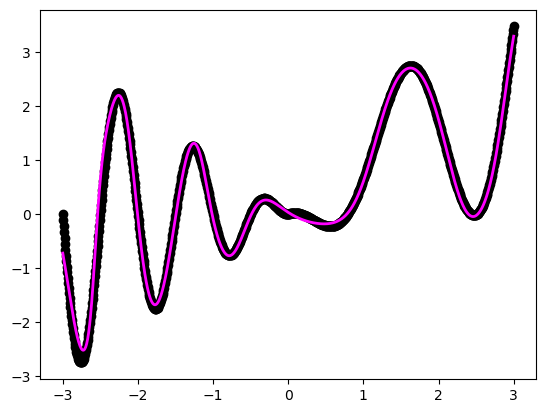

[array([[ 1.1559359 ,  2.18325   , -1.208068  , -1.9266864 , -1.424526  ,
        -0.7904632 , -0.86168003,  1.0834163 , -3.0505626 ,  0.85081035,
        -0.6729779 ,  0.8244    ]], dtype=float32), array([ 1.2746171 ,  0.33311793,  0.32195142, -4.8606524 ,  0.6597578 ,
        0.65988624,  2.241774  , -3.0631335 , -3.0035303 ,  1.2667259 ,
        0.99618936,  1.2646765 ], dtype=float32)]
[array([[ 1.8377624e-02,  1.1626288e+00, -8.7816691e-01,  6.3012427e-01,
        -1.9646535e-02,  7.6118565e-01, -2.1883766e-01,  4.1289693e-01,
         1.4640519e-01, -4.1123006e-02, -9.6271443e-01,  3.7243193e-01],
       [-3.6837900e-01,  1.0270528e+00,  3.4672427e-01,  1.5191795e-01,
         1.4736465e-01, -4.6488788e-02, -1.0360969e+00, -8.5372758e-01,
        -6.7710644e-01, -2.5643852e-01, -5.1453274e-01,  2.6510444e-01],
       [ 1.0542065e-01, -5.7690322e-01,  2.2159962e-01,  3.7627676e-01,
        -1.1723168e-01, -7.7377820e-01, -2.3370461e-01, -1.5080235e+00,
        -2.1182917e-01, -8.7

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

# создаём модель нейросети, используя Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim=1, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))
    model.add(Dense(12, input_dim=12, activation='tanh', bias_initializer='he_normal', kernel_initializer='he_normal'))   
    model.add(Dense(1, input_dim=12, activation='linear', bias_initializer='he_normal', kernel_initializer='he_normal'))
    
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

# тренируем сеть
model = baseline_model()
model.summary()
# model.fit(x, y, nb_epoch=100, verbose = 0)
model.fit(x, y, epochs=400, verbose = 2)

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='magenta', linewidth=2, antialiased=True)

plt.show()

# выводим веса на экран
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

# Домашнее задание
1. Проработайте блокнот Jupyter содержащий пример, демонстрировавшийся на занятии.
2. Повторите решение задачи для индивидуального варианта функции, поэкспериментируйте со структурой сети (количество скрытых слоев, нейронов в слоях) до получения высокой точности аппроксимации.